In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2147 - accuracy: 0.9347
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0858 - accuracy: 0.9734
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0622 - accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0458 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0372 - accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0305 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0251 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0231 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0186 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9829


[0.06910242885351181, 0.9829000234603882]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [12]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [13]:
y_predict[0]

array([4.2167669e-11, 5.6223960e-11, 4.7242697e-06, 9.9218859e-08,
       6.9786912e-13, 5.2372516e-11, 3.8604895e-16, 9.9999499e-01,
       7.0605979e-11, 1.0616669e-07], dtype=float32)

In [14]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector

In [15]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [16]:
y_test.shape

(10000,)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
y_predicts.shape

(10000,)

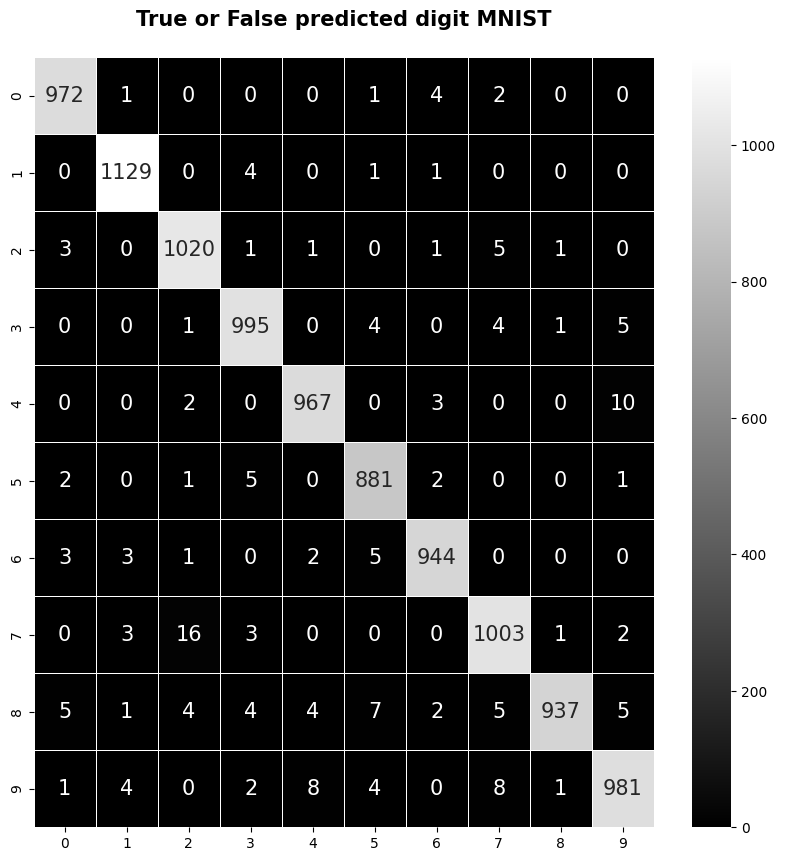

In [19]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test,y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [25]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


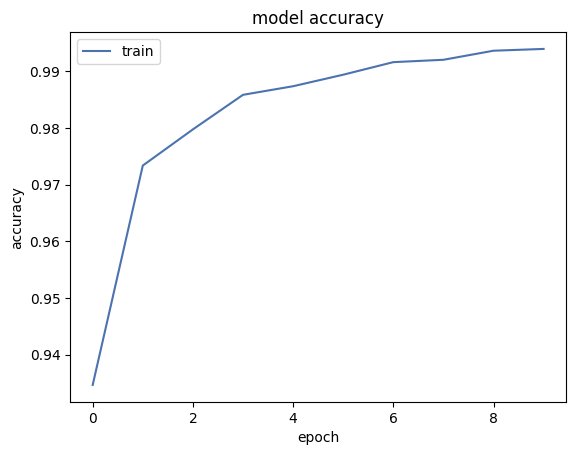

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


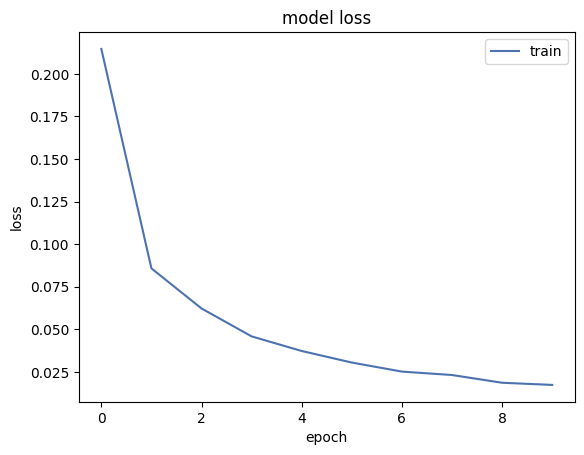

In [29]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

1/1 [==============================] - 0s 20ms/step
6


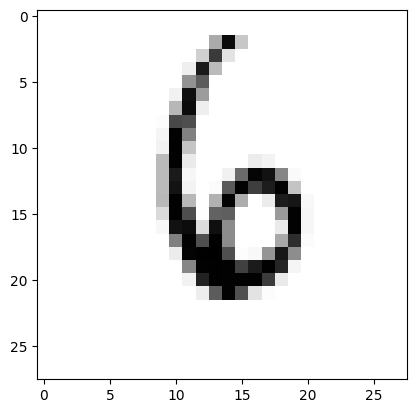

In [31]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())